# Bayesian_learning


**Notebook putting the excellent Machine lectures of Nando de Freitas in code/(LA)tex(t). **
We are dealing with Bayesian learning.

- Learn how Bayes rule is derived.
- apply Bayes rule 
- apply Bayesian learning to linear models
- the mechanics of conjugate analysis.

slides on:
http://www.cs.ubc.ca/~nando/540-2013/lectures/l5.pdf

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

# path to png's
PATH = 'C:\\Users\\Schiphol\\Documents\\ubc_ml\\tut_png\\bayesian_learning\\'

There is an alternative to Maximum Likelihood (ML), called Bayesian Learning. We'll see that this is a problem of integration instead of a problem of optimization. Up until now, we've seen 2 good ways to select a model: put up a large complex model, put on a regularizer, do CV to find the ideal delta and the right model complexity. But also the more data we have, the more room there is for obtaining a complex model. This is the game changer for Google's advanced **deep learning** methods. Problem they face is about scaling. 

ML gives reasonable results  but we have made the assumption that this **co-variance matrix sigma** for regression means that every point has the same variance. That doesn't make sense in areas where we have seen data. Being able to quantify uncertainty like on the right is what Bayesian models are able to add and are also key in decision making. If I have a system that doesn't passively learn from data, but also is actively gathering data, then that system needs to know what it doens't know = good estimates of uncertainty. 

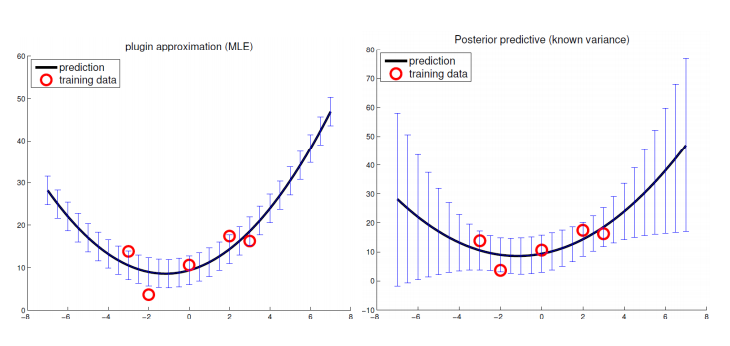

In [13]:
Image(filename = PATH + "mle_vs_bayesian.png", width=800, height=200)

No escape: fundamental law of probability is **Bayes Rule**: $P(A \rvert B) = \frac{P(B \rvert A) P(A)}{P(B)}$: it enables us to **reverse probabilities**. Bayesian inference is a key concept when studying human and animal perceptions. Parsing this formula further:

$$



The Bayesian approach, as you might expect, begins and ends with probabilities. It recognizes that what we fundamentally want to compute is our knowledge of the parameters in question.